In [1]:
import pandas as pd
import seaborn as sns

In [14]:
rankings = {}
rankings_aggr = {}
rankings_non_aggr = {}
rankings_nw8 = {}
rankings_nw8_aggr = {}
rankings_nw8_non_aggr = {}

alpha = 0.65

df = pd.read_csv('ranks/alpha_'+str(alpha)+'.desc',header = None)
df = df[df.index<100]
rankings = {k: i for i, k in enumerate(df[0].tolist())}

df = pd.read_csv('ranks/alpha_'+str(alpha)+'_aggr.desc',header = None)
df = df[df.index<100]
rankings_aggr = {k: i for i, k in enumerate(df[0].tolist())}

df = pd.read_csv('ranks/alpha_'+str(alpha)+'_non_aggr_reduced.desc',header = None)
df = df[df.index<100]
rankings_non_aggr = {k: i for i, k in enumerate(df[0].tolist())}

intersection_all_aggr = set(rankings).intersection(set(rankings_aggr))
intersection_all_nonaggr = set(rankings).intersection(set(rankings_non_aggr))
intersection_aggr_nonaggr = set(rankings_aggr).intersection(set(rankings_non_aggr))

In [15]:
df = pd.read_csv('ranks/network8_alpha_'+str(alpha)+'.desc',header = None)
df = df[df.index<100]
rankings_nw8 = {k: i for i, k in enumerate(df[0].tolist())}

df = pd.read_csv('ranks/network8_alpha_'+str(alpha)+'_aggr.desc',header = None)
df = df[df.index<100]
rankings_nw8_aggr = {k: i for i, k in enumerate(df[0].tolist())}

df = pd.read_csv('ranks/network8_alpha_'+str(alpha)+'_non_aggr_reduced.desc',header = None)
df = df[df.index<100]
rankings_nw8_non_aggr = {k: i for i, k in enumerate(df[0].tolist())}

intersection_all_aggr_net8 = set(rankings_nw8).intersection(set(rankings_nw8_aggr))
intersection_all_nonaggr_net8 = set(rankings_nw8).intersection(set(rankings_nw8_non_aggr))
intersection_aggr_nonaggr_net8 = set(rankings_nw8_aggr).intersection(set(rankings_nw8_non_aggr))

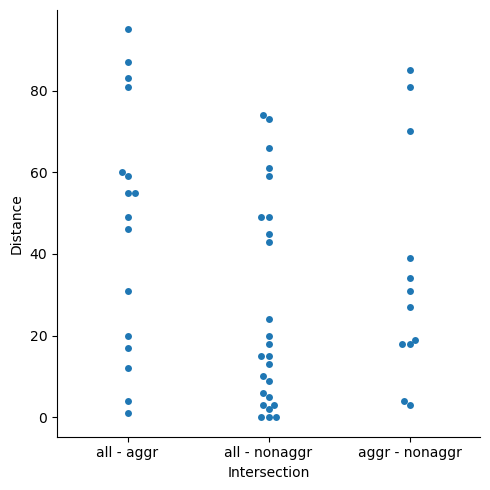

In [16]:
##Network 1

## Intersection all - aggr
inter = []
distance = []
position = []

inter_all_aggr_section = []


for g in intersection_all_aggr:
    value_all = rankings[g]
    value_aggr = rankings_aggr[g]
    if (value_all > 50 and value_aggr > 50) or (value_all < 50 and value_aggr < 50):
        inter_all_aggr_section.append(g)
    total_value = abs(value_all - value_aggr)
    inter.append("all - aggr")
    distance.append(total_value)
    
inter_all_nonaggr_section = []
    
## Intersection all - nonaggr
for g in intersection_all_nonaggr:
    value_all = rankings[g]
    value_nonaggr = rankings_non_aggr[g]
    if (value_all > 50 and value_nonaggr > 50) or (value_all < 50 and value_nonaggr < 50):
        inter_all_nonaggr_section.append(g)
    total_value = abs(value_all - value_nonaggr)
    inter.append("all - nonaggr")
    distance.append(total_value)

inter_aggr_nonaggr_section = []

## Intersection aggr - nonaggr
for g in intersection_aggr_nonaggr:
    value_aggr = rankings_aggr[g]
    value_nonaggr = rankings_non_aggr[g]
    if (value_aggr > 50 and value_nonaggr > 50) or (value_aggr < 50 and value_nonaggr < 50):
        inter_aggr_nonaggr_section.append(g)
    total_value = abs(value_aggr - value_nonaggr)
    inter.append("aggr - nonaggr")
    distance.append(total_value)

    
d = {'Intersection': inter, 'Distance': distance}
df = pd.DataFrame(data=d)

sns_plot = sns.catplot(data=df, x="Intersection", y="Distance", kind="swarm")
sns_plot.savefig("./plots_ranks/differences_ranking_genes_reduced.png")

In [17]:
inter_eq = set(inter_all_aggr_section).intersection(set(intersection_all_nonaggr))
inter_eq_2 = set(inter_aggr_nonaggr_section).intersection(inter_eq)
print("Overlap between all the Equal section genes: " + str(len(inter_eq_2)))
print("\n")

genes_section = []
pos_all = []
pos_nonaggr = []
pos_aggr = []

for g in inter_eq_2: 
    genes_section.append(g)
    pos_all.append(rankings[g])
    pos_aggr.append(rankings_aggr[g])
    pos_nonaggr.append(rankings_non_aggr[g])

    
d_section = {'Gene': genes_section, 'Pos ranking all': pos_all, 'Pos ranking aggr': pos_aggr, 'Pos ranking nonaggr': pos_nonaggr}
df_section = pd.DataFrame(data=d_section)
print(df_section)
df_section.to_csv("./plots_ranks/Overlap_between_all_the_Equal_section_reduced.csv") 

Overlap between all the Equal section genes: 1


   Gene  Pos ranking all  Pos ranking aggr  Pos ranking nonaggr
0  TP53                1                 0                    3


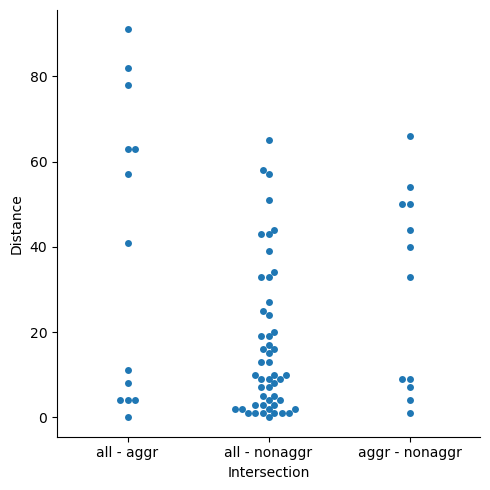

In [20]:
##Network 8

## Intersection all - aggr
inter = []
distance = []
position = []

inter_all_aggr_section_net8 = []


for g in intersection_all_aggr_net8:
    value_all = rankings_nw8[g]
    value_aggr = rankings_nw8_aggr[g]
    if (value_all > 50 and value_aggr > 50) or (value_all < 50 and value_aggr < 50):
        inter_all_aggr_section_net8.append(g)
    total_value = abs(value_all - value_aggr)
    inter.append("all - aggr")
    distance.append(total_value)
    
inter_all_nonaggr_section_net8 = []
    
## Intersection all - nonaggr
for g in intersection_all_nonaggr_net8:
    value_all = rankings_nw8[g]
    value_nonaggr = rankings_nw8_non_aggr[g]
    if (value_all > 50 and value_nonaggr > 50) or (value_all < 50 and value_nonaggr < 50):
        inter_all_nonaggr_section_net8.append(g)
    total_value = abs(value_all - value_nonaggr)
    inter.append("all - nonaggr")
    distance.append(total_value)

inter_aggr_nonaggr_section_net8 = []

## Intersection aggr - nonaggr
for g in intersection_aggr_nonaggr_net8:
    value_aggr = rankings_nw8_aggr[g]
    value_nonaggr = rankings_nw8_non_aggr[g]
    if (value_aggr > 50 and value_nonaggr > 50) or (value_aggr < 50 and value_nonaggr < 50):
        inter_aggr_nonaggr_section_net8.append(g)
    total_value = abs(value_aggr - value_nonaggr)
    inter.append("aggr - nonaggr")
    distance.append(total_value)

    
d = {'Intersection': inter, 'Distance': distance}
df = pd.DataFrame(data=d)

sns_plot = sns.catplot(data=df, x="Intersection", y="Distance", kind="swarm")
sns_plot.savefig("./plots_ranks/network8_differences_ranking_genes_reduced.png")

In [19]:
inter_eq = set(inter_all_aggr_section_net8).intersection(set(intersection_all_nonaggr_net8))
inter_eq_2 = set(inter_aggr_nonaggr_section_net8).intersection(inter_eq)
print("Overlap between all the Equal section genes: " + str(len(inter_eq_2)))
print("\n")

genes_section = []
pos_all = []
pos_nonaggr = []
pos_aggr = []

for g in inter_eq_2: 
    genes_section.append(g)
    pos_all.append(rankings_nw8[g])
    pos_aggr.append(rankings_nw8_aggr[g])
    pos_nonaggr.append(rankings_nw8_non_aggr[g])

    
d_section = {'Gene': genes_section, 'Pos ranking all': pos_all, 'Pos ranking aggr': pos_aggr, 'Pos ranking nonaggr': pos_nonaggr}
df_section = pd.DataFrame(data=d_section)
print(df_section)
df_section.to_csv("./plots_ranks/network8_Overlap_between_all_the_Equal_section_reduced.csv") 

Overlap between all the Equal section genes: 4


    Gene  Pos ranking all  Pos ranking aggr  Pos ranking nonaggr
0   TP53                4                 0                    7
1   SOX2               13                21                   12
2   NME2                5                 1                    5
3  NCOA3                9                 5                    4
